In [69]:
from collections import deque
import pandas as pd
import numpy as np
import random

In [36]:
dq = deque(maxlen=10)
dq.append((2, 'two'))
dq.append((4, 'four'))
dq.append((5, 'five'))

temp = dq[-2]
temp = list(temp)
temp[0] = 3
temp = tuple(temp)

dq[1] = temp
print(temp)
print(dq)

(3, 'four')
deque([(2, 'two'), (3, 'four'), (5, 'five')], maxlen=10)


In [37]:
memory = deque(maxlen=10)
memory.append((1,2,3,4,5))
memory.append((6,7,8,9,10))
print(memory)
# print(memory[-1])
print(*memory)

deque([(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)], maxlen=10)
(1, 2, 3, 4, 5) (6, 7, 8, 9, 10)


In [38]:
state_before, action_chosen, reward_given, state_after, game_overs = memory[-1] # unpack into lists rather than tu

print(state_before)
print(action_chosen)

6
7


In [39]:
print(state_before)
print(action_chosen)

6
7


In [40]:
import pandas as pd
# import torch


In [41]:

df = pd.read_csv(r'C:\Users\sebas\Documents\GitHub\ClimAIte\EMS_work\dataframes_output_test.csv')
# df[20:25]

In [42]:
df.head()

,Datetime,Timestep,Calling Point,zn0_temp,zn0_RH,electricity_facility,electricity_heating,zn0_heating_sp,oa_rh,oa_db,oa_pa,sun_up,rain,snow,wind_dir,wind_speed
0,2018-01-01 01:00:00,1,callback_begin_zone_timestep_before_set_curren...,20.000000,32.322090,0.000000e+00,0.000000e+00,0.0,91.0,3.7,95090.0,False,False,False,230.0,8.7
1,2018-01-01 01:30:00,1,callback_begin_zone_timestep_before_set_curren...,19.320456,33.248484,7.979455e+06,3.913816e+07,1.8,87.0,3.6,95079.0,False,False,True,250.0,9.3
2,2018-01-01 02:00:00,1,callback_begin_zone_timestep_before_set_curren...,19.283770,33.270184,8.353683e+06,6.248610e+07,1.8,83.0,4.0,95095.0,False,False,True,250.0,9.3
3,2018-01-01 03:00:00,1,callback_begin_zone_timestep_before_set_curren...,19.316825,33.140391,8.353423e+06,6.425469e+07,0.9,85.0,4.2,95050.0,False,False,True,240.0,12.9
4,2018-01-01 04:00:00,1,callback_begin_zone_timestep_before_set_curren...,19.326590,33.084614,7.979437e+06,6.263834e+07,0.2,90.0,4.2,94897.0,False,False,True,240.0,17.0


<Axes: xlabel='Datetime'>

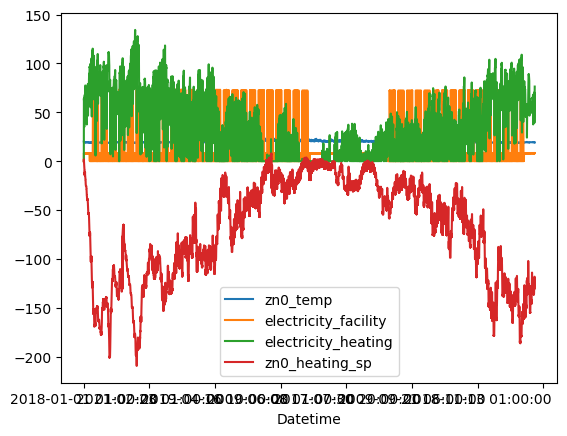

In [43]:
# df[20:30]
# df.plot.scatter(x='Datetime', y= ['zn0_temp', 'electricity_heating', 'zn0_heating_sp'])
# df.plot.scatter(x='Datetime', y= 'zn0_temp')
df['electricity_heating'] = df['electricity_heating'] / 1000000
df['electricity_facility'] = df['electricity_facility'] / 1000000
df.plot.line(x='Datetime', y= ['zn0_temp', 'electricity_facility', 'electricity_heating', 'zn0_heating_sp'])

<Axes: xlabel='Datetime'>

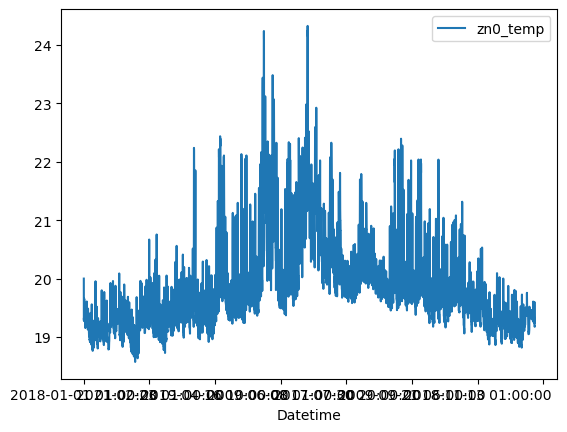

In [46]:
df.plot.line(x='Datetime', y= ['zn0_temp'])

In [44]:
df_memory = pd.read_csv(r'C:\Users\sebas\Documents\GitHub\ClimAIte\EMS_work\agent memory.csv')

In [45]:
df_memory.head()


,Unnamed: 0,state_prev,action,next_reward,next_state,game_over
0,0,[20. 1. 1. 3.2],"[tensor([1.8415], grad_fn=<AddBackward0>)]",-6.52,[19.32045608 1. 1. 3.2 ],False
1,1,[19.32045608 1. 1. 3.2 ],"[tensor([1.7626], grad_fn=<AddBackward0>)]",-10.41,[19.28377007 2. 1. 3. ],False
2,2,[19.28377007 2. 1. 3. ],"[tensor([0.9316], grad_fn=<AddBackward0>)]",-10.71,[19.3168254 3. 1. 2.5 ],False
3,3,[19.3168254 3. 1. 2.5 ],"[tensor([0.1760], grad_fn=<AddBackward0>)]",-10.44,[19.32658982 4. 1. 2.2 ],False
4,4,[19.32658982 4. 1. 2.2 ],"[tensor([-0.5550], grad_fn=<AddBackward0>)]",-10.68,[19.28685268 6. 1. 2.5 ],False


# Actuator dictionary

In [141]:
z1_louvre_names_list = [f'z1_louvre_{x+1}' for x in range(20)]
z2_louvre_names_list = [f'z2_louvre_{x+1}' for x in range(38)]
print(z1_louvre_names_list)
print(z2_louvre_names_list)

['z1_louvre_1', 'z1_louvre_2', 'z1_louvre_3', 'z1_louvre_4', 'z1_louvre_5', 'z1_louvre_6', 'z1_louvre_7', 'z1_louvre_8', 'z1_louvre_9', 'z1_louvre_10', 'z1_louvre_11', 'z1_louvre_12', 'z1_louvre_13', 'z1_louvre_14', 'z1_louvre_15', 'z1_louvre_16', 'z1_louvre_17', 'z1_louvre_18', 'z1_louvre_19', 'z1_louvre_20']
['z2_louvre_1', 'z2_louvre_2', 'z2_louvre_3', 'z2_louvre_4', 'z2_louvre_5', 'z2_louvre_6', 'z2_louvre_7', 'z2_louvre_8', 'z2_louvre_9', 'z2_louvre_10', 'z2_louvre_11', 'z2_louvre_12', 'z2_louvre_13', 'z2_louvre_14', 'z2_louvre_15', 'z2_louvre_16', 'z2_louvre_17', 'z2_louvre_18', 'z2_louvre_19', 'z2_louvre_20', 'z2_louvre_21', 'z2_louvre_22', 'z2_louvre_23', 'z2_louvre_24', 'z2_louvre_25', 'z2_louvre_26', 'z2_louvre_27', 'z2_louvre_28', 'z2_louvre_29', 'z2_louvre_30', 'z2_louvre_31', 'z2_louvre_32', 'z2_louvre_33', 'z2_louvre_34', 'z2_louvre_35', 'z2_louvre_36', 'z2_louvre_37', 'z2_louvre_38']


In [143]:
tc_actuators = { # 'user_var_name': ['component_type', 'control_type', 'actuator_key'] within the dict
    # HVAC Control Setpoints
    # 'zn0_cooling_sp': [('Zone Temperature Control', 'Cooling Setpoint', zn0)],  # deg C
    'zn0_heating_sp': [('Zone Temperature Control', 'Heating Setpoint', 'zn0')],  # deg C
} # Z2_LOUVRE_20,AirFlow Network Window/Door Opening,Venting Opening Factor,[Fraction]

for name_of_control_this_run, each in enumerate(z1_louvre_names_list):
    tc_actuators[f'z1_louvre_act_{name_of_control_this_run+1}'] = [('AirFlow Network Window/Door Opening', 'Venting Opening Factor', each)]
for name_of_control_this_run, each in enumerate(z2_louvre_names_list):
    tc_actuators[f'z2_louvre_act_{name_of_control_this_run+1}'] = [('AirFlow Network Window/Door Opening', 'Venting Opening Factor', each)]

all_zones_louvre_act_names_list = [f'z1_louvre_act_{x+1}' for x in range(20)] + [f'z2_louvre_act_{x+1}' for x in range(38)]

print(all_zones_louvre_act_names_list)

['z1_louvre_act_1', 'z1_louvre_act_2', 'z1_louvre_act_3', 'z1_louvre_act_4', 'z1_louvre_act_5', 'z1_louvre_act_6', 'z1_louvre_act_7', 'z1_louvre_act_8', 'z1_louvre_act_9', 'z1_louvre_act_10', 'z1_louvre_act_11', 'z1_louvre_act_12', 'z1_louvre_act_13', 'z1_louvre_act_14', 'z1_louvre_act_15', 'z1_louvre_act_16', 'z1_louvre_act_17', 'z1_louvre_act_18', 'z1_louvre_act_19', 'z1_louvre_act_20', 'z2_louvre_act_1', 'z2_louvre_act_2', 'z2_louvre_act_3', 'z2_louvre_act_4', 'z2_louvre_act_5', 'z2_louvre_act_6', 'z2_louvre_act_7', 'z2_louvre_act_8', 'z2_louvre_act_9', 'z2_louvre_act_10', 'z2_louvre_act_11', 'z2_louvre_act_12', 'z2_louvre_act_13', 'z2_louvre_act_14', 'z2_louvre_act_15', 'z2_louvre_act_16', 'z2_louvre_act_17', 'z2_louvre_act_18', 'z2_louvre_act_19', 'z2_louvre_act_20', 'z2_louvre_act_21', 'z2_louvre_act_22', 'z2_louvre_act_23', 'z2_louvre_act_24', 'z2_louvre_act_25', 'z2_louvre_act_26', 'z2_louvre_act_27', 'z2_louvre_act_28', 'z2_louvre_act_29', 'z2_louvre_act_30', 'z2_louvre_act_31

In [357]:
for key, value in tc_actuators.items():
    print(key, ' : ', value)

print(all_zones_louvre_act_names_list)
mydict = {}
for each in all_zones_louvre_act_names_list:
    mydict[each] = 0.5
    
dict1 = {'num1': 84}
dict2 = {'num2': 93}
dict1.update(dict2)
print(dict1)
print(mydict)

{'num1': 84, 'num2': 93}
{'z1_louvre_act_1': 0.5, 'z1_louvre_act_2': 0.5, 'z1_louvre_act_3': 0.5, 'z1_louvre_act_4': 0.5, 'z1_louvre_act_5': 0.5, 'z1_louvre_act_6': 0.5, 'z1_louvre_act_7': 0.5, 'z1_louvre_act_8': 0.5, 'z1_louvre_act_9': 0.5, 'z1_louvre_act_10': 0.5, 'z1_louvre_act_11': 0.5, 'z1_louvre_act_12': 0.5, 'z1_louvre_act_13': 0.5, 'z1_louvre_act_14': 0.5, 'z1_louvre_act_15': 0.5, 'z1_louvre_act_16': 0.5, 'z1_louvre_act_17': 0.5, 'z1_louvre_act_18': 0.5, 'z1_louvre_act_19': 0.5, 'z1_louvre_act_20': 0.5, 'z2_louvre_act_1': 0.5, 'z2_louvre_act_2': 0.5, 'z2_louvre_act_3': 0.5, 'z2_louvre_act_4': 0.5, 'z2_louvre_act_5': 0.5, 'z2_louvre_act_6': 0.5, 'z2_louvre_act_7': 0.5, 'z2_louvre_act_8': 0.5, 'z2_louvre_act_9': 0.5, 'z2_louvre_act_10': 0.5, 'z2_louvre_act_11': 0.5, 'z2_louvre_act_12': 0.5, 'z2_louvre_act_13': 0.5, 'z2_louvre_act_14': 0.5, 'z2_louvre_act_15': 0.5, 'z2_louvre_act_16': 0.5, 'z2_louvre_act_17': 0.5, 'z2_louvre_act_18': 0.5, 'z2_louvre_act_19': 0.5, 'z2_louvre_act_20

# Q-net to Actuation

In [157]:
for u in range(41):

    # myresults = np.zeros(41).tolist()
    myresults = [0 for x in range(41)]

    print(len(myresults))

    # num = random.randint(0,40)
    myresults[u] = 1
    # num = random.randint(0,40)
    # myresults[num] = 1
    print(myresults)

    print(myresults.index(1))


    assert sum(myresults) == 1, "There appears to be more than one action chosen by Q-net"
    print(sum(myresults))

    # 19 - 20.9 C at 0.1
    # windows, 0 or 1, open or close
    # final option 40, closed windows, 5.0 C sp
    # 0-19, full temp, windows closed
    # 20-39 full temp, windows open
    # 40 closed windows 5.0 C

    results_dict = {}

    if myresults.index(1) <= 19:
        print('Index is: ', myresults.index(1))
        heat_setpoint = 19 + 2 / 20 * (myresults.index(1))
        win_frac = 0

    elif myresults.index(1) >= 20 and myresults.index(1) <= 39:
        print('Index is: ', myresults.index(1))
        heat_setpoint = 19 + 2 / 20 * (myresults.index(1) - 20) # -20 as indices are +20 higher
        win_frac = 1

    elif myresults.index(1) == 40:
        print('Index is: ', myresults.index(1))
        heat_setpoint = 5 # low temp option
        win_frac = 0

    else:
        print('Error, no action chosen')
        print('Index is: ', myresults.index(1))

    results_dict['zn0_heating_sp'] = heat_setpoint
    results_dict['zn1_heating_sp'] = heat_setpoint

    short_act_list = all_zones_louvre_act_names_list[0:2]
    for name_of_control_this_run in range(len(short_act_list)):
        results_dict[short_act_list[name_of_control_this_run]] = win_frac
    # results_dict.update([results_dict[short_act_list[x]] = win_frac for x in short_act_list])

    print(len(short_act_list))
    print(results_dict)

41
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1
Index is:  0
2
{'zn0_heating_sp': 19.0, 'zn1_heating_sp': 19.0, 'z1_louvre_act_1': 0, 'z1_louvre_act_2': 0}
41
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1
1
Index is:  1
2
{'zn0_heating_sp': 19.1, 'zn1_heating_sp': 19.1, 'z1_louvre_act_1': 0, 'z1_louvre_act_2': 0}
41
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2
1
Index is:  2
2
{'zn0_heating_sp': 19.2, 'zn1_heating_sp': 19.2, 'z1_louvre_act_1': 0, 'z1_louvre_act_2': 0}
41
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3
1
Index is:  3
2
{'zn0_heating_sp': 19.3, 'zn1_heating_sp': 19.3, 'z1_louvre_act_1': 0, 'z1_louvre_act_2': 0}
41
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0

# Weather and school active

In [159]:
import datetime
import math

booleanlist_school_active = []
timeis = []
dayis = []
selftime = 13 # hour of day, 0-23
selfdayofweek = 2 # 1-7, Mon-Sunday
work_day_start = datetime.time(8, 0)  # day starts 6 am
work_day_end = datetime.time(16, 0)  

counter = 0
while counter < 72:
    if (work_day_start.hour <= (selftime + counter) % 24 < work_day_end.hour # check time
    and ( 0 < (selfdayofweek + math.floor((selftime + counter) / 24)) % 7 < 6) ): # check weekend. Sunday = 0
        booleanlist_school_active.append(1)
    
    else:
        booleanlist_school_active.append(0)
    timeis.append((selftime + counter) % 24)
    dayis.append((selfdayofweek + math.floor((selftime + counter) / 24)) % 7)
    counter += 1

ert = list(reversed(booleanlist_school_active))

In [160]:
print(booleanlist_school_active)
print(timeis)
print(dayis)
ert = list(reversed(booleanlist_school_active))
print(ert)
print(len(booleanlist_school_active))

[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
72


In [14]:
import random
import datetime
import math

future_weather_24h = []
timeis = []
dayis = []
selftime = 20 # hour of day, 0-23
selfdayofweek = 5 # 1-7, Mon-Sunday

daytodaytomo = []
counter = 0
while counter < 24:
    temp_weather = 0
    if selftime + counter <= 23: # Today
        # temp_weather = self.bca.get_weather_forecast(['oa_db'], 'today', selftime + counter, 1)
        temp_weather = random.randint(-10,40)
        daytodaytomo.append('today')
    elif selftime + counter > 23: # Tomorrow
        # temp_weather = self.bca.get_weather_forecast(['oa_db'], 'tomorrow', (selftime + counter) % 24, 1)
        temp_weather = random.randint(-10,40)
        daytodaytomo.append('tomorrow')

    future_weather_24h.append(temp_weather)
    timeis.append((selftime + counter) % 24)
    dayis.append((selfdayofweek + math.floor((selftime + counter) / 24)) % 7)
    counter += 1

# normalise future_weather_24h
def normalise(xvalue, xmin, xmax):
    xvalue = np.clip(xvalue, xmin, xmax)
    return round( (xvalue - xmin) / (xmax - xmin) , 5)

def denormalise(xvalue_norm, xmin, xmax):
    return round( xvalue_norm * (xmax - xmin) + xmin , 2)
        

In [15]:
denormalise(0.59, -10, 40)

19.5

In [119]:
print(future_weather_24h)
print(len(future_weather_24h))
print(timeis)
print(daytodaytomo)
print(dayis)

[40, 39, -8, -4, 34, 3, -3, -1, -10, 36, -5, 32, 20, 33, 22, 21, 36, -10, 4, -10, 12, 15, -3, 7]
24
[20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
['today', 'today', 'today', 'today', 'tomorrow', 'tomorrow', 'tomorrow', 'tomorrow', 'tomorrow', 'tomorrow', 'tomorrow', 'tomorrow', 'tomorrow', 'tomorrow', 'tomorrow', 'tomorrow', 'tomorrow', 'tomorrow', 'tomorrow', 'tomorrow', 'tomorrow', 'tomorrow', 'tomorrow', 'tomorrow']
[5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]


In [131]:
normed = [normalise(x, -10, 40) for x in future_weather_24h]
print(normed)
# normrange = [normalise(x, -10, 40) for x in range(-10,41)]
# print(normrange)
print([denormalise(x, -10, 40) for x in normed])
print(future_weather_24h)
# print([denormalise(x, -10, 40) for x in normrange])

[0.0, 0.82, 0.74, 0.84, 0.1, 0.38, 0.26, 0.2, 0.9, 0.42, 0.22, 0.92, 0.64, 0.0, 0.78, 0.5, 0.74, 0.28, 0.24, 0.18, 0.26, 0.28, 0.64, 0.18]
[-10.0, 31.0, 27.0, 32.0, -5.0, 9.0, 3.0, 0.0, 35.0, 11.0, 1.0, 36.0, 22.0, -10.0, 29.0, 15.0, 27.0, 4.0, 2.0, -1.0, 3.0, 4.0, 22.0, -1.0]
[-10, 31, 27, 32, -5, 9, 3, 0, 35, 11, 1, 36, 22, -10, 29, 15, 27, 4, 2, -1, 3, 4, 22, -1]


In [169]:
# Torch RNN !!
import torch
import torch.nn as nn

# booleanlist_school_active
print(booleanlist_school_active)
schoolnormed = [float(normalise(x, 0, 1)) for x in booleanlist_school_active]
print(schoolnormed)

y1 = []
y2 = []
y3 = []
y4 = []

for name_of_control_this_run in range(72):
    normedrev = list(reversed(schoolnormed))
    normedrev = normedrev[name_of_control_this_run:]
    torch.manual_seed(4)
    rnn = nn.RNN(len(normedrev), 4, 1)
    normedtensor = torch.tensor(normedrev)
    normed2D = torch.unsqueeze(normedtensor, 0)
    input = torch.FloatTensor(normed2D)
    h0 = torch.rand(1, 4)
    output, hn = rnn(input, h0) 

    # print(torch.rand(2,3,20).size())
    # print(output.size())
    # print(hn.size())
    print(output)
    print('length of seq ', len(normedrev))
    y1.append(output.tolist()[0][0])
    y2.append(output.tolist()[0][1])
    y3.append(output.tolist()[0][2])
    y4.append(output.tolist()[0][3])

[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
tensor([[0.9100, 0.3190, 0.9638, 0.8589]], grad_fn=<SqueezeBackward1>)
length of seq  72
tensor([[ 0.8269,  0.8358, -0.6743,  0.9913]], grad_fn=<SqueezeBackward1>)
length of seq  71
tensor([[-0.2747,  0.6284, -0.7353,  0.7745]], grad_fn=<SqueezeBackward1>)
length of seq  70
tensor([[ 0.7381,  0.9372, -0.9546, -0.5979]], grad_fn=<SqueezeBackward1>)
length of seq  69
tensor([[ 0.2803,  0.8540, -0.3589, -0.9793]], grad_fn

In [173]:
normedrev = list(reversed(schoolnormed))
normedrev = normedrev[name_of_control_this_run:]
torch.manual_seed(4)
rnn = nn.RNN(len(normedrev), 4, 1)
normedtensor = torch.tensor(normedrev)
normed2D = torch.unsqueeze(normedtensor, 0)
input = torch.FloatTensor(normed2D)
h0 = torch.rand(1, 4)
output, hn = rnn(input, h0) 

print(output.tolist()[0])

[0.613903284072876, -0.23324617743492126, 0.5946317315101624, -0.47584131360054016]


In [190]:
array3 = np.array([546,84,8,6,849,894,498], dtype=float)
# newarray = np.array([4, 5, output.tolist()[0], 9], dtype=float)
print(array3)
print(array3.dtype)
five = 4
sixsix = [6,6,66]
seven = 7
quickarray = np.concatenate(([five], sixsix, [seven]))
print(quickarray)
print(quickarray.dtype)

[546.  84.   8.   6. 849. 894. 498.]
float64
[ 4  6  6 66  7]
int32


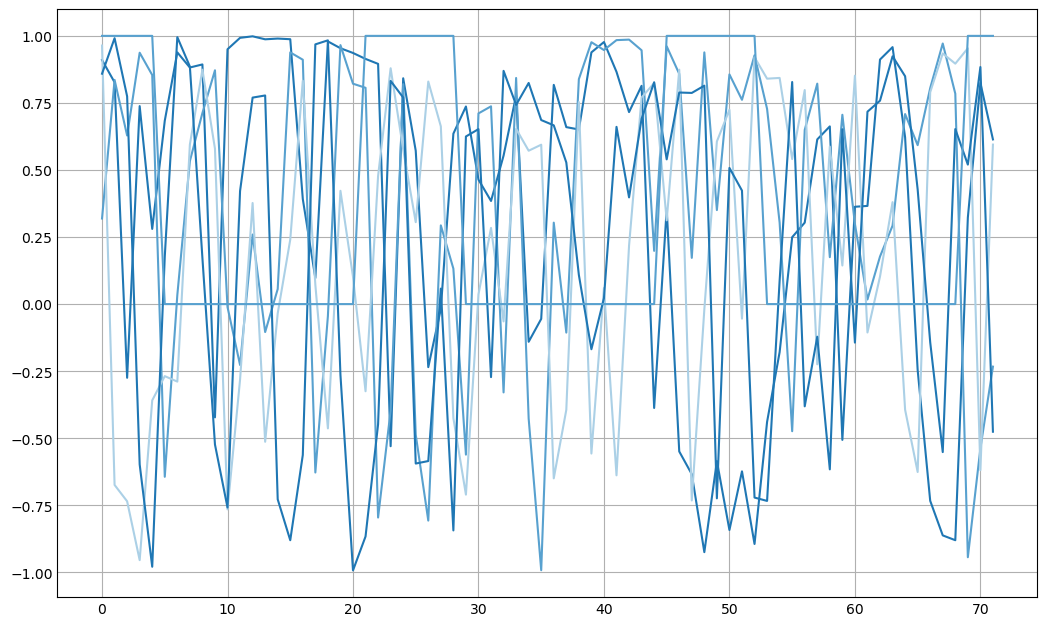

In [327]:
import matplotlib.pyplot as plt

# x1 = [2,4,6,8]
# x2 = [3,5,7,9]
x = [x for x in range(72)]

plt.figure(figsize=(10,6))
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.plot(x, list(reversed(booleanlist_school_active)))

plt.show()

In [331]:
normed2D.size()
print(output)
print(output.squeeze())
print(output.tolist()[0][0])
print(output.tolist()[0][1])
print(output.tolist()[0][2])
print(output.tolist()[0][3])

tensor([[ 0.6139, -0.2332,  0.5946, -0.4758]], grad_fn=<SqueezeBackward1>)
tensor([ 0.6139, -0.2332,  0.5946, -0.4758], grad_fn=<SqueezeBackward0>)
0.613903284072876
-0.23324617743492126
0.5946317315101624
-0.47584131360054016


In [328]:
print(torch.rand(2,3,20).size())
print(output.size())
print(hn.size())

torch.Size([2, 3, 20])
torch.Size([1, 4])
torch.Size([1, 4])


# Eppy

In [33]:
from eppy import modeleditor
from eppy.modeleditor import IDF
iddfile = r"C:\EnergyPlusV22-2-0\Energy+.idd"
fname1 = r"C:\Users\sebas\Documents\GitHub\ClimAIte\EMS_work\test_files\Base_model simple schedule.idf"
IDF.setiddname(iddfile)
idf1 = IDF(fname1)

# print(idf1.idfobjects['RUNPERIOD'][0].Begin_Year)
# idf1.idfobjects['RUNPERIOD'][0].End_Year = idf1.idfobjects['RUNPERIOD'][0].Begin_Year + 2
# print(idf1.idfobjects['RUNPERIOD'][0].End_Year)

# print(idf1.idfobjects['RUNPERIOD'][0])
# surface_names_list = []
# print(len(idf1.idfobjects['BuildingSurface:Detailed']))
# for each in range(len(idf1.idfobjects['BuildingSurface:Detailed'])):
#     surface_names_list.append(idf1.idfobjects['BuildingSurface:Detailed'][each].Name)

print(idf1.idfobjects['Output:Variable'][0])
idf1.newidfobject('Output:Variable')
idf1.idfobjects['Output:Variable'][-1].Variable_Name = 'Surface Heat Storage Rate per Area'
print(idf1.idfobjects['Output:Variable'][-1])
idf1.newidfobject('Output:Variable')
idf1.idfobjects['Output:Variable'][-1].Variable_Name = 'Surface Heat Storage Energy'
print(idf1.idfobjects['Output:Variable'])
# idf1.save()


Output:Variable,
    ,                         !- Key Value
    AFN Zone Infiltration Sensible Heat Gain Energy,    !- Variable Name
    Hourly;                   !- Reporting Frequency


OUTPUT:VARIABLE,
    *,                        !- Key Value
    Surface Heat Storage Rate per Area,    !- Variable Name
    Hourly;                   !- Reporting Frequency

[
Output:Variable,
    ,                         !- Key Value
    AFN Zone Infiltration Sensible Heat Gain Energy,    !- Variable Name
    Hourly;                   !- Reporting Frequency
, 
Output:Variable,
    ,                         !- Key Value
    Chiller Heater System Heating Electricity Energy,    !- Variable Name
    Hourly;                   !- Reporting Frequency
, 
Output:Variable,
    ,                         !- Key Value
    Cooling Coil Electricity Energy,    !- Variable Name
    Hourly;                   !- Reporting Frequency
, 
Output:Variable,
    ,                         !- Key Value
    Cooling Coil Water 

In [25]:
print(surface_names_list)

['Face_1ae11434', 'Face_1b41438a', 'Face_348d4290', 'Face_3f06c9da', 'Face_55a312c2_0', 'Face_55a312c2_1', 'Face_5828f0d6', 'Face_5e49596a', 'Face_64c8d618', 'Face_66fdd20a', 'Face_764cd5bf', 'Face_8125e6a2', 'Face_86131092', 'Face_8c88ab1a', 'Face_8e5cb91f', 'Face_8fd830a5', 'Face_97a1a957', 'Face_9ce18f48', 'Face_9dcc2bc9', 'Face_a8ad978b', 'Face_afbff8d1', 'Face_b5e11a50', 'Face_b6aa5750', 'Face_bb5f41d8', 'Face_c0f6e335', 'Face_c221d030', 'Face_c22ecf67', 'Face_c75e345c', 'Face_ca6b9c9b', 'Face_d20c05af', 'Face_e54a7519', 'Face_ea365c1a', 'Face_f1cb2e00', 'Face_f933a4d2', 'Face_fb01ec05', 'Face_fd0564b8', 'Face_ff334b3f', 'Face_01c76018', 'Face_25cfe114', 'Face_2f409256_0', 'Face_2f409256_1', 'Face_2f409256_10', 'Face_2f409256_11', 'Face_2f409256_12', 'Face_2f409256_13', 'Face_2f409256_14', 'Face_2f409256_15', 'Face_2f409256_16', 'Face_2f409256_17', 'Face_2f409256_18', 'Face_2f409256_19', 'Face_2f409256_2', 'Face_2f409256_20', 'Face_2f409256_21', 'Face_2f409256_22', 'Face_2f409256_

In [ ]:
name_of_control_this_run = 'EPBaseline' 
dict_control_names = {
            'EPBaseline':0,
            'RLBaseNoForesight':1,
            'RL24hAllRNN':2,
            'RL24hNoSolarRNN':3,
            'RL04hAllRNN':4,
            'RL04hNoSolarRNN':5,
            'RL04hFlatInput':6}
current_control_no = dict_control_names[name_of_control_this_run]

print(name_of_control_this_run, dict_control_names,  current_control_no
)

In [10]:
import os

base_path = r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs"
unique_building_name = 'fjealkj'

idf_file_name = os.path.join(base_path, unique_building_name, 'in.idf')

print(idf_file_name)

W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs\fjealkj\in.idf


In [3]:
mylist = [4,3,53,6,3,6,46,47,64]
print(len(mylist))
print(mylist[:4])
if mylist[0] == 4:
    print('truee')
    abe = 23

print('\n', list(reversed(mylist[:4])))

9
[4, 3, 53, 6]
truee

 [6, 53, 3, 4]


In [5]:
print(False or False or True or False)

import os

os.chdir("W:/Insync/")

os.listdir()

True


['CORE', 'GDrive']

In [12]:
model_folder_path = r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs\new test"
if not os.path.exists(model_folder_path):
        os.makedirs(model_folder_path)

os.chdir(model_folder_path)

In [65]:
import numpy as np
import torch
zn1_temp_norm = 25
zn2_temp_norm = 24
elec_heating_norm = 875
future_work_hour_booleans_norm = [0,0,0,0,1,1,1,1,1,0,0,0,0,0]
future_global_rad_norm = [156,12,1564,456,456,456,4568,46]
# future_diffuse_rad_norm 
future_ext_temp_norm = [24,25,24,23,25,26,18,26,18,34]

Couldn't import dot_parser, loading of dot files will not be possible.


In [75]:
state_prev = np.concatenate(([zn1_temp_norm], # the no. items must match the QNet input size
                            [zn2_temp_norm],
                            [elec_heating_norm],
                            future_work_hour_booleans_norm,
                            future_global_rad_norm[:4],
                            # future_diffuse_rad_norm[:4],
                            future_ext_temp_norm[:4])) # nnSizeOBS

In [71]:
state_prev = zn1_temp_norm, zn2_temp_norm, elec_heating_norm, future_work_hour_booleans_norm

In [90]:
print(state_prev)
print(state_prev[0])
print(state_prev[1])
print(state_prev[-1])
print(type(state_prev))

[  25   24  875    0    0    0    0    1    1    1    1    1    0    0
    0    0    0  156   12 1564  456   24   25   24   23]
25
24
23
<class 'numpy.ndarray'>


In [126]:
state0 = torch.tensor(state_prev, dtype=torch.float)
print(state0)
print(len(state0.size()))

tensor([2.5000e+01, 2.4000e+01, 8.7500e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5600e+02,
        1.2000e+01, 1.5640e+03, 4.5600e+02, 2.4000e+01, 2.5000e+01, 2.4000e+01,
        2.3000e+01])
1


In [192]:
# in batch training
state_batch = torch.unsqueeze(state0, 0)
state_multi = torch.concat([state_batch, state_batch*1.5, state_batch+3.33, state_batch+1.11])
print(state_batch)
print(state_batch.size())

tensor([[2.5000e+01, 2.4000e+01, 8.7500e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5600e+02,
         1.2000e+01, 1.5640e+03, 4.5600e+02, 2.4000e+01, 2.5000e+01, 2.4000e+01,
         2.3000e+01]])
torch.Size([1, 25])


In [193]:
print(state0[1:5])
print(state_batch[0][1]) # unsqueezed, batch

tensor([ 24., 875.,   0.,   0.])
tensor(24.)


In [194]:
print(state0.size())
print(state_batch.size())
print(state_batch.view(25))

torch.Size([25])
torch.Size([1, 25])
tensor([2.5000e+01, 2.4000e+01, 8.7500e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5600e+02,
        1.2000e+01, 1.5640e+03, 4.5600e+02, 2.4000e+01, 2.5000e+01, 2.4000e+01,
        2.3000e+01])


In [195]:
print(state_multi)
print(state_multi.shape)

tensor([[2.5000e+01, 2.4000e+01, 8.7500e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5600e+02,
         1.2000e+01, 1.5640e+03, 4.5600e+02, 2.4000e+01, 2.5000e+01, 2.4000e+01,
         2.3000e+01],
        [3.7500e+01, 3.6000e+01, 1.3125e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.5000e+00, 1.5000e+00, 1.5000e+00, 1.5000e+00, 1.5000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.3400e+02,
         1.8000e+01, 2.3460e+03, 6.8400e+02, 3.6000e+01, 3.7500e+01, 3.6000e+01,
         3.4500e+01],
        [2.8330e+01, 2.7330e+01, 8.7833e+02, 3.3300e+00, 3.3300e+00, 3.3300e+00,
         3.3300e+00, 4.3300e+00, 4.3300e+00, 4.3300e+00, 4.3300e+00, 4.3300e+00,
         3.3300e+00, 3.3300e+00, 3.3300e+00, 3.3300e+00, 3.3300e+00, 1.5933e+02,
         1.5330e+01, 1.5673e+03, 4.5933e+02, 2.7330e+01, 2.8330e+

In [218]:
batch_size = state_multi.size(0)
# print([state_multi[x][:5] for x in range(batch_size)])
# print(state_multi[:2])
# torch.tensor_split()
x = state_multi.split_with_sizes([3,4,18],1)
# x1, x2, x3 = x[0], x[1], x[2]
new_state_multi = torch.concat((x[0],x[1],x[2]), 1)
print(x)
print(x[0])
# print('batch size ', batch_size)
# state_multi.view(batch_size, 25)
print(torch.equal(state_multi, new_state_multi))

(tensor([[  25.0000,   24.0000,  875.0000],
        [  37.5000,   36.0000, 1312.5000],
        [  28.3300,   27.3300,  878.3300],
        [  26.1100,   25.1100,  876.1100]]), tensor([[0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [3.3300, 3.3300, 3.3300, 3.3300],
        [1.1100, 1.1100, 1.1100, 1.1100]]), tensor([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5600e+02, 1.2000e+01,
         1.5640e+03, 4.5600e+02, 2.4000e+01, 2.5000e+01, 2.4000e+01, 2.3000e+01],
        [1.5000e+00, 1.5000e+00, 1.5000e+00, 1.5000e+00, 1.5000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.3400e+02, 1.8000e+01,
         2.3460e+03, 6.8400e+02, 3.6000e+01, 3.7500e+01, 3.6000e+01, 3.4500e+01],
        [4.3300e+00, 4.3300e+00, 4.3300e+00, 4.3300e+00, 4.3300e+00, 3.3300e+00,
         3.3300e+00, 3.3300e+00, 3.3300e+00, 3.3300e+00, 1.5933e+02, 1.5330e+01,
     

In [197]:
print(state_batch[-1][2])
print(state_multi[-1][2])


tensor(875.)
tensor(876.1100)


In [198]:
print(state_multi)
print([state_multi[-1].pop(0) for i in range(2)])

tensor([[2.5000e+01, 2.4000e+01, 8.7500e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5600e+02,
         1.2000e+01, 1.5640e+03, 4.5600e+02, 2.4000e+01, 2.5000e+01, 2.4000e+01,
         2.3000e+01],
        [3.7500e+01, 3.6000e+01, 1.3125e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.5000e+00, 1.5000e+00, 1.5000e+00, 1.5000e+00, 1.5000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.3400e+02,
         1.8000e+01, 2.3460e+03, 6.8400e+02, 3.6000e+01, 3.7500e+01, 3.6000e+01,
         3.4500e+01],
        [2.8330e+01, 2.7330e+01, 8.7833e+02, 3.3300e+00, 3.3300e+00, 3.3300e+00,
         3.3300e+00, 4.3300e+00, 4.3300e+00, 4.3300e+00, 4.3300e+00, 4.3300e+00,
         3.3300e+00, 3.3300e+00, 3.3300e+00, 3.3300e+00, 3.3300e+00, 1.5933e+02,
         1.5330e+01, 1.5673e+03, 4.5933e+02, 2.7330e+01, 2.8330e+

AttributeError: 'Tensor' object has no attribute 'pop'

In [ ]:
x = state_multi.view((1,)+ (5,-1))

In [ ]:
print(x)

tensor([[[2.5000e+01, 2.4000e+01, 8.7500e+02, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00],
         [1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 1.5600e+02, 1.2000e+01, 1.5640e+03],
         [4.5600e+02, 2.4000e+01, 2.5000e+01, 2.4000e+01, 2.3000e+01,
          3.7500e+01, 3.6000e+01, 1.3125e+03, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 1.5000e+00, 1.5000e+00, 1.5000e+00,
          1.5000e+00, 1.5000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 2.3400e+02, 1.8000e+01, 2.3460e+03,
          6.8400e+02, 3.6000e+01, 3.7500e+01, 3.6000e+01, 3.4500e+01]]])


In [276]:
print(x[0])

tensor([[  25.0000,   24.0000,  875.0000],
        [  37.5000,   36.0000, 1312.5000],
        [  28.3300,   27.3300,  878.3300],
        [  26.1100,   25.1100,  876.1100]])


In [226]:
list_names = ['RLBaseNoForesight', 'RL24hAllRNN', 'RL04hAllRNN', 'RL24hNoSolarRNN', 'RL04hNoSolarRNN', 'RL04hFlatInput']
for name_of_control_this_run in list_names:
    print(name_of_control_this_run)
    if name_of_control_this_run[2:4] == '24':
        control_foresight = 24
    elif name_of_control_this_run[2:4] == '04':
        control_foresight = 4
    else:
        control_foresight = 0
    print(f'\t {control_foresight}')
    print(name_of_control_this_run[2:4])

RLBaseNoForesight
	 0
Ba
RL24hAllRNN
	 24
24
RL04hAllRNN
	 4
04
RL24hNoSolarRNN
	 24
24
RL04hNoSolarRNN
	 4
04
RL04hFlatInput
	 4
04


In [268]:
def init_hidden(batch_size, n_rnns):
    zero_tensor = torch.zeros(batch_size ,4 * n_rnns, dtype=torch.float)
    # new_zero_tensor = zero_tensor
    # for i in range(n_rnns-1):
        
    #     new_zero_tensor = torch.concat((new_zero_tensor, zero_tensor), 1)
    return zero_tensor

In [274]:
print(init_hidden(6,2))

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


In [281]:
torch.zeros(1, 3 ,4, dtype=torch.float)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [282]:

from eppy import modeleditor
from eppy.modeleditor import IDF

In [284]:
base_path = r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 06"
unique_building_name = 'Building-InsuBASE-MassBASE'

iddfile = r"C:\EnergyPlusV22-2-0\Energy+.idd"
fname1 = os.path.join(base_path, unique_building_name, 'in.idf')
IDF.setiddname(iddfile)
idf1 = IDF(fname1)
idf1.idfobjects['RUNPERIOD'][0].End_Month = 12
idf1.idfobjects['RUNPERIOD'][0].End_Day_of_Month = 31
if name_of_control_this_run == 'EPBaseline': # 1 year only
    idf1.idfobjects['RUNPERIOD'][0].End_Year = idf1.idfobjects['RUNPERIOD'][0].Begin_Year
else: # 3 years run period
    idf1.idfobjects['RUNPERIOD'][0].End_Year = idf1.idfobjects['RUNPERIOD'][0].Begin_Year + 2
# idf1.newidfobject('Output:Variable')

In [293]:
len(idf1.idfobjects['BuildingSurface:Detailed'][x].Space_Name for x in range(115))
# names

TypeError: object of type 'generator' has no len()